In [11]:
import sys
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('merged_checked.csv')

In [12]:
df

,id,title,annotator,Q1.1,Q1.2,Q1.3,Q1.3.1,Q1.4,Q1.5,Q1.6,Q1.7,Q1.7.1,Q1.7.1.2
0,18d71db7-f362-46fa-953e-d8353c7f7232,Coronavirus| nuove regole: al tavolo al ristor...,Manuel,2;1;1;1;1,2,3,-1,2,4,4,1,-1,-1
1,18d71db7-f362-46fa-953e-d8353c7f7232,Coronavirus| nuove regole: al tavolo al ristor...,Angelo,2;1;1;1;1,3,1;3,1,1,4,4,1,-1,-1
2,3ca70f03-38f3-4a7b-bdd3-f012b22e0c7e,Israele: Lapid| ostacoli ma fiducioso su nuovo...,Manuel,2;1;1;1;1,4,1;3,-1,2,4,4,1,-1,-1
3,3ca70f03-38f3-4a7b-bdd3-f012b22e0c7e,Israele: Lapid| ostacoli ma fiducioso su nuovo...,Marinella,2;1;1;1;1,4,1;3,-1,1,4,4,2,-1,-1
4,34b92f4c-32db-454c-a369-ca2032443f6c,Le borsette fatte a 3 euro l'ora vendute a 820...,Manuel,1;2;1;1;1,3,3,-1,1,3,2,2,-1,Fashion craft industries system
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,3696bc79-2f24-47e2-9f13-fabd92b7a271,"Variante Delta, quanto sono efficaci i vaccini...",ChatGPT4AsAnnotator,2;1;2;1;1,4,1,-1,2,4,4,1,-1,-1
1015,89ca8966-8ade-49fd-a036-c528a1f7871c,Tutti i passi falsi di Davigo: dal caso Palama...,ChatGPT4AsAnnotator,1;1;2;1;1,4,1,-1,2,4,4,2,0,-1
1016,a425710b-96e3-4840-87be-75deea62775d,Quanto si preoccupa l'Ue per la Macron fatigue,ChatGPT4AsAnnotator,2;1;2;1;1,4,1,-1,1,4,4,1,-1,-1
1017,df86ebbe-1672-4c99-8895-b0fe742ed00c,CSM ED I VERBALI DI AMARA: I SEGRETI DELLA NUO...,ChatGPT4AsAnnotator,1;2;2;1;1,4,1;5,-1,1,3,3,2,0;4,"Judiciary, media professionals"


# Kappa

In [13]:
def custom_agreement(column_name, set1, set2):


    # Se si tratta della prima colonna (Q1.1) devo trattarla diversamente
    if (column_name == 'Q1.1'):
        # Split the numbers
        set1 = set1.split(";")
        set2 = set2.split(";")
        # Verifica se entrambe le liste contengono almeno un 2
        if '2' in set1 and '2' in set2:
            # Verifica se i 2 sono nella stessa posizione
            if set1 == set2:
                return 1
            # Verifica se nella seconda lista c'è almeno un 2 nella stessa posizione
            elif any(a == b == '2' for a, b in zip(set1, set2)):
                return 1
            else:
                return 0
        else:
            return 0

    # Convert strings to sets of integers
    set1 = {int(x) for x in set1.split(';')}
    set2 = {int(x) for x in set2.split(';')}
    
    # Check for any intersection
    if set1.intersection(set2):
        return 1  # Agreement if there is at least one common element
    return 0  # No agreement otherwise

def inter_annotator_agreement(df, column_name, annotator1, annotator2):
    # Filter rows for the given annotators
    df_annotator1 = df[df['annotator'] == annotator1]
    df_annotator2 = df[df['annotator'] == annotator2]
    
    # Merge dataframes on the ID column
    merged_df = df_annotator1.merge(df_annotator2, on='id')
    
    # Filter rows with non-missing values for the given column
    merged_df = merged_df.dropna(subset=[column_name+'_x', column_name+'_y'])

    # Rimuovo le righe vuote dal dataset degli annotatori, vanno bene le righe perché tanto c'è un valore solo
    merged_df = merged_df[merged_df[column_name+'_x'] != -1]
    merged_df = merged_df[merged_df[column_name+'_x'] != '-1']
    
    if column_name == 'Q1.1' or column_name == 'Q1.3' or column_name == 'Q1.7.1':
        # Calculate custom agreement for 'Q1.1'
        agreements = [custom_agreement(column_name, row[column_name+'_x'], row[column_name+'_y']) for index, row in merged_df.iterrows()]
        agreement_score = sum(agreements) / len(agreements) if agreements else 0
    else:
        # Calculate Cohen's Kappa coefficient for other cases
        agreement_score = cohen_kappa_score(merged_df[column_name+'_x'], merged_df[column_name+'_y'])
    
    print('Kappa tra ' + annotator1 + ' e ' + annotator2 + ' per ' + column_name + ': ' + str(agreement_score))


inter_annotator_agreement(df, 'Q1.1', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.1', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.1', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.2', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.2', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.2', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.3', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.3', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.3', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.3.1', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.3.1', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.3.1', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.4', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.4', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.4', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.5', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.5', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.5', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.6', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.6', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.6', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.7', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.7', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.7', 'Manuel', 'ChatGPT4AsAnnotator')
print('')
inter_annotator_agreement(df, 'Q1.7.1', 'Manuel', 'Angelo')
inter_annotator_agreement(df, 'Q1.7.1', 'Manuel', 'Marinella')
inter_annotator_agreement(df, 'Q1.7.1', 'Manuel', 'ChatGPT4AsAnnotator')


Kappa tra Manuel e Angelo per Q1.1: 0.8148148148148148
Kappa tra Manuel e Marinella per Q1.1: 0.8387096774193549
Kappa tra Manuel e ChatGPT4AsAnnotator per Q1.1: 0.7835497835497836

Kappa tra Manuel e Angelo per Q1.2: 0.4273594909862142
Kappa tra Manuel e Marinella per Q1.2: 0.3660504201680672
Kappa tra Manuel e ChatGPT4AsAnnotator per Q1.2: 0.022283167637984325

Kappa tra Manuel e Angelo per Q1.3: 0.9887640449438202
Kappa tra Manuel e Marinella per Q1.3: 0.9741379310344828
Kappa tra Manuel e ChatGPT4AsAnnotator per Q1.3: 0.5073170731707317

Kappa tra Manuel e Angelo per Q1.3.1: 0.6666666666666667
Kappa tra Manuel e Marinella per Q1.3.1: 0.3599062133645956
Kappa tra Manuel e ChatGPT4AsAnnotator per Q1.3.1: 0.03193916349809878

Kappa tra Manuel e Angelo per Q1.4: 0.3913118427857266
Kappa tra Manuel e Marinella per Q1.4: 0.5003808073115004
Kappa tra Manuel e ChatGPT4AsAnnotator per Q1.4: 0.36788836068087716

Kappa tra Manuel e Angelo per Q1.5: 0.5023041474654377
Kappa tra Manuel e Marine

In [14]:

def custom_agreement(column_name,set1, set2):

    # Split the numbers
    set1 = set1.split(";")
    set2 = set2.split(";")

    # Se si tratta della prima colonna (Q1.1) devo trattarla diversamente
    if (column_name == 'Q1.1'):
        # Verifica se entrambe le liste contengono almeno un 2
        if '2' in set1 and '2' in set2:
            # Verifica se i 2 sono nella stessa posizione
            if set1 == set2:
                return "Perfect Agreement"
            # Verifica se nella seconda lista c'è almeno un 2 nella stessa posizione
            elif any(a == b == '2' for a, b in zip(set1, set2)):
                return "Partial Agreement (Extra Incorrect)"
            else:
                return "No Agreement (All Incorrect)"
        else:
            return "No Agreement (All Incorrect)"


    # Cast elements into integers
    set1 = [int(item) for item in set1]
    set2 = [int(item) for item in set2]

    if set1 == set2:
        return 'Perfect Agreement'
    elif set(set1).issubset(set(set2)):
        return 'Partial Agreement (Some Correct)'
    elif set(set2).issuperset(set(set1)):
        return 'Partial Agreement (Extra Incorrect)'
    else:
        return 'No Agreement (All Incorrect)'

def inter_annotator_agreement(df, column_name, annotator1, annotator2):
    df_annotator1 = df[df['annotator'] == annotator1]
    df_annotator2 = df[df['annotator'] == annotator2]
    
    merged_df = df_annotator1.merge(df_annotator2, on='id')
    merged_df = merged_df.dropna(subset=[column_name+'_x', column_name+'_y'])
    
    perfect_agreement_count = 0
    partial_correct_count = 0

    partial_extra_count = 0
    no_agreement_count = 0
    
    for index, row in merged_df.iterrows():
        if (row[column_name+'_x'] != -1 and row[column_name+'_x'] != '-1'):
            agreement_category = custom_agreement(column_name,row[column_name+'_x'], row[column_name+'_y'])
            if agreement_category == 'Perfect Agreement':
                perfect_agreement_count += 1
            elif agreement_category == 'Partial Agreement (Some Correct)':
                partial_correct_count += 1
            elif agreement_category == 'Partial Agreement (Extra Incorrect)':
                partial_extra_count += 1
            elif agreement_category == 'No Agreement (All Incorrect)':
                no_agreement_count += 1

    print(annotator1 + ' e ' + annotator2 + ' per ' + column_name + ':')

    print('   Perfect Agreement:', perfect_agreement_count)
    if (column_name != 'Q1.1'):
        print('   Partial Agreement (Some Correct):', partial_correct_count)
    print('   Partial Agreement (Extra Incorrect):', partial_extra_count)
    print('   No Agreement (All Incorrect):', no_agreement_count)
    print('\n')


inter_annotator_agreement(df, 'Q1.1', 'Manuel', 'ChatGPT4AsAnnotator')
inter_annotator_agreement(df, 'Q1.3', 'Manuel', 'ChatGPT4AsAnnotator')
inter_annotator_agreement(df, 'Q1.7.1', 'Manuel', 'ChatGPT4AsAnnotator')

Manuel e ChatGPT4AsAnnotator per Q1.1:
   Perfect Agreement: 105
   Partial Agreement (Extra Incorrect): 76
   No Agreement (All Incorrect): 50


Manuel e ChatGPT4AsAnnotator per Q1.3:
   Perfect Agreement: 26
   Partial Agreement (Some Correct): 2
   Partial Agreement (Extra Incorrect): 0
   No Agreement (All Incorrect): 177


Manuel e ChatGPT4AsAnnotator per Q1.7.1:
   Perfect Agreement: 2
   Partial Agreement (Some Correct): 1
   Partial Agreement (Extra Incorrect): 0
   No Agreement (All Incorrect): 23




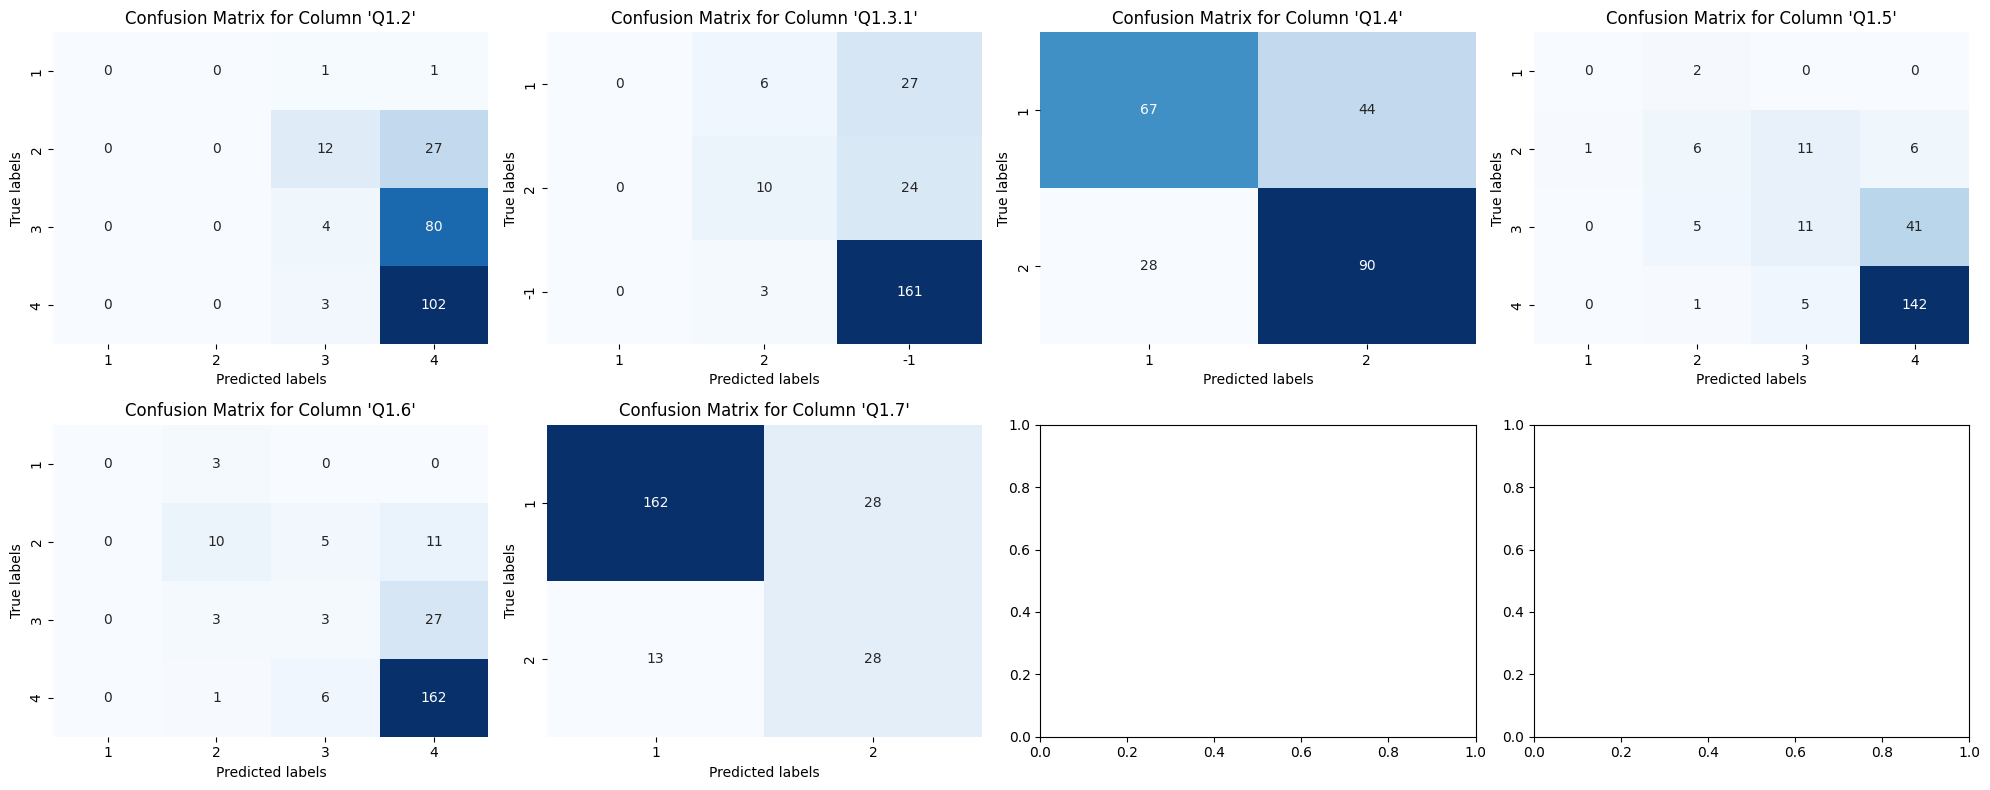

In [16]:


def calculate_confusion_matrix(annotator_1, annotator_2, columns, possible_values):
    confusion_matrices = {}
    for column in columns:
        y_true = []
        y_pred = []

        articles = set(df[df['annotator'] == annotator_1]['id']).intersection(
            set(df[df['annotator'] == annotator_2]['id']))

        for article_id in articles:
            annotator1 = df[(df['id'] == article_id) & (df['annotator'] == annotator_1)][[column]]
            annotator2 = df[(df['id'] == article_id) & (df['annotator'] == annotator_2)][[column]]

            annotator1 = annotator1.astype(str)
            annotator2 = annotator2.astype(str)

            for col in annotator1.columns:
                annotations_1 = annotator1[col].values.flatten()
                annotations_2 = annotator2[col].values.flatten()
                for ann_1, ann_2 in zip(annotations_1, annotations_2):
                    y_true.append(ann_1)
                    y_pred.append(ann_2)

        confusion_matrices[column] = confusion_matrix(y_true, y_pred, labels=possible_values[column])
    plot_confusion_matrices(confusion_matrices, possible_values)
    return 0

def plot_confusion_matrices(conf_matrices, possible_values):
    num_cols = len(conf_matrices)
    num_rows = int(np.ceil(num_cols / 4))
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4))

    for i, (column, conf_matrix) in enumerate(conf_matrices.items()):
        row = i // 4
        col = i % 4
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[row, col], 
                    xticklabels=possible_values[column], yticklabels=possible_values[column])
        axes[row, col].set_xlabel("Predicted labels")
        axes[row, col].set_ylabel("True labels")
        axes[row, col].set_title(f"Confusion Matrix for Column '{column}'")

    plt.tight_layout()
    plt.show()





columns_to_consider = ["Q1.2", "Q1.3.1", "Q1.4", "Q1.5", "Q1.6", "Q1.7"]
possible_values = {
    'Q1.2': ['1', '2', '3', '4'],
    'Q1.3.1': ['1', '2', '-1'],
    'Q1.4': ['1', '2'],
    'Q1.5': ['1', '2', '3', '4'],
    'Q1.6': ['1', '2', '3', '4'],
    'Q1.7': ['1', '2'],
}

conf_matrices = calculate_confusion_matrix('Manuel','ChatGPT4AsAnnotator', columns_to_consider, possible_values)